<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

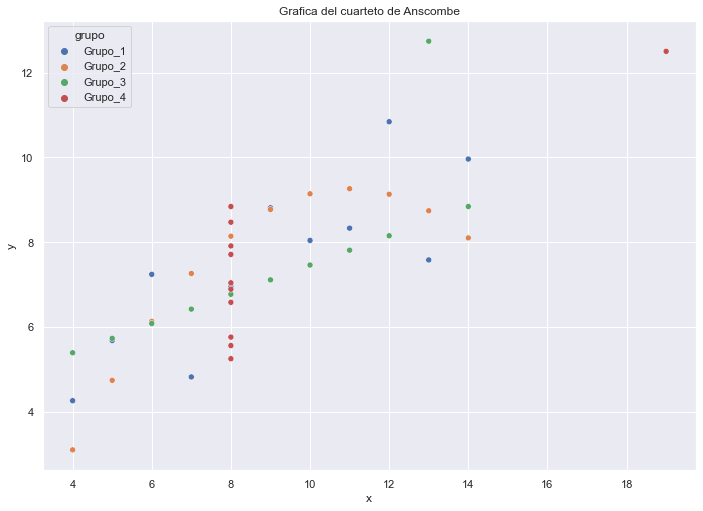

In [3]:
# scatter

# Grupo 1
sns.scatterplot(
    x='x',
    y='y',
    data=df,
    hue='grupo'
)
plt.title('Grafica del cuarteto de Anscombe')
plt.show()

Los grupos corresponden al cuarteto de Anscombe, los cuales no se ven muy distintos entre sí a excepción del grupo 4.

In [4]:
# descripcion del conjunto de datos
print('Resumen del Grupo 1:\n')
df[df['grupo']=='Grupo_1'].describe()

Resumen del Grupo 1:



,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [5]:
print('Resumen del Grupo 2:\n')
df[df['grupo']=='Grupo_2'].describe()

Resumen del Grupo 2:



,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [6]:
print('Resumen del Grupo 3:\n')
df[df['grupo']=='Grupo_3'].describe()

Resumen del Grupo 3:



,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [7]:
print('Resumen del Grupo 4:\n')
df[df['grupo']=='Grupo_4'].describe()

Resumen del Grupo 4:



,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Podríamos decir según la descripción de los datos que la mayoría de ellos se encuentra en el rango [6,11]. Además, el grupo 4 podría presentar valores atípicos. Planteamos el modelo de Regresión Lineal para cada grupo:

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X1 = df[df['grupo']=='Grupo_1'][['x']] # we only take the first two features.
y1 = df[df['grupo']=='Grupo_1']['y']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.35, random_state=42)

# print rows train and test sets
print('Separando informacion del Grupo 1:\n')
print('numero de filas data original : ',len(X1))
print('numero de filas train set     : ',len(X1_train))
print('numero de filas test set      : ',len(X1_test))

Separando informacion del Grupo 1:

numero de filas data original :  11
numero de filas train set     :  7
numero de filas test set      :  4


In [9]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl1 = LinearRegression() # Creando el modelo.

In [10]:
# ajustando el modelo
model_rl1.fit(X1_train, y1_train) 

LinearRegression()

In [11]:
# Lista de coeficientes B para cada X

beta1_0 = round(model_rl1.intercept_,2)
beta1_1 = round(model_rl1.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f_1(x) = {beta1_0} + {beta1_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f_1(x) = 3.56 + 0.46*x


In [12]:
# predicciones
Y1_predict = model_rl1.predict(X1_test)
Y1_predict

array([10.02274554,  8.17712054,  6.79290179,  5.87008929])

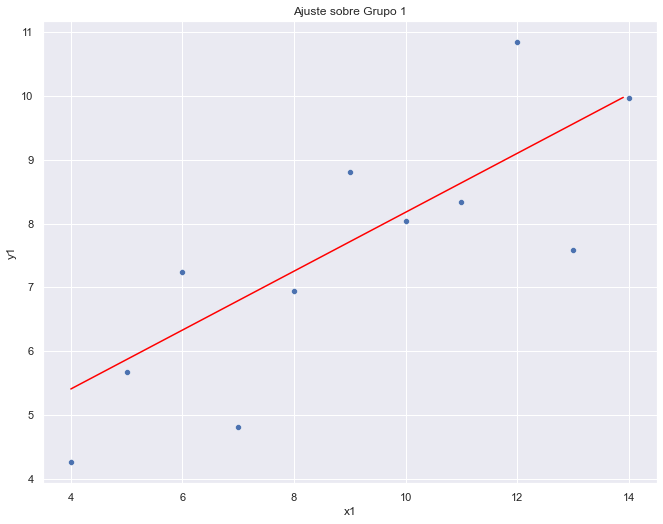

In [13]:
# graficos con seaborn
        
beta1_0 = model_rl1.intercept_
beta1_1 = model_rl1.coef_[0]
        
x1_range = np.arange(4,14,0.1)
        
df_plot1 = pd.DataFrame({'x':x1_range,
                        'y_true':[beta1_0 + beta1_1*n for n in x1_range]})
  
df1 = pd.DataFrame({'x':X1['x'],
                           'y_true':y1})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot1,ax=ax,color="red")

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Ajuste sobre Grupo 1')
plt.show()

Gráficamente nuestro modelo no se ajusta tan bien a los datos, pues la recta solo toma 1 dato. No obstante, los datos tienen una dispersión considerable, por lo que los puntos se encuentran cerca de la recta. Veamos las métricas:

In [14]:
from metrics_regression import *
from sklearn.metrics import r2_score
 
df_temp1 = pd.DataFrame(
    {
        'y':y1_test,
        'yhat': model_rl1.predict(X1_test)
        }
)

df_metrics1 = summary_metrics(df_temp1)
# calcular r2 y r2 ajustado

r2 = round(r2_score(y1_test, model_rl1.predict(X1_test)),4)

df_metrics1['r2'] =  r2

print('\nMetricas para el regresor x1:')
df_metrics1


Metricas para el regresor x1:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.5907,0.9878,0.9939,0.1165,0.1113,0.0829,0.0971,0.099,0.7572


Basado en los datos y las métricas, podemos decir que el modelo se aproxima bien a los datos.

In [15]:
# import some data to play with

X2 = df[df['grupo']=='Grupo_2'][['x']] # we only take the first two features.
y2 = df[df['grupo']=='Grupo_2']['y']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.36, random_state=42)

# print rows train and test sets
print('Separando informacion del Grupo 2:\n')
print('numero de filas data original : ',len(X2))
print('numero de filas train set     : ',len(X2_train))
print('numero de filas test set      : ',len(X2_test))

Separando informacion del Grupo 2:

numero de filas data original :  11
numero de filas train set     :  7
numero de filas test set      :  4


In [16]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl2 = LinearRegression() # Creando el modelo.

In [17]:
# ajustando el modelo
model_rl2.fit(X2_train, y2_train) 

LinearRegression()

In [18]:
# Lista de coeficientes B para cada X

beta2_0 = round(model_rl2.intercept_,2)
beta2_1 = round(model_rl2.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f_2(x) = {beta2_0} + {beta2_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f_2(x) = 2.15 + 0.61*x


In [19]:
# predicciones
Y2_predict = model_rl2.predict(X2_test)
Y2_predict

array([10.644375,  8.216875,  6.39625 ,  5.1825  ])

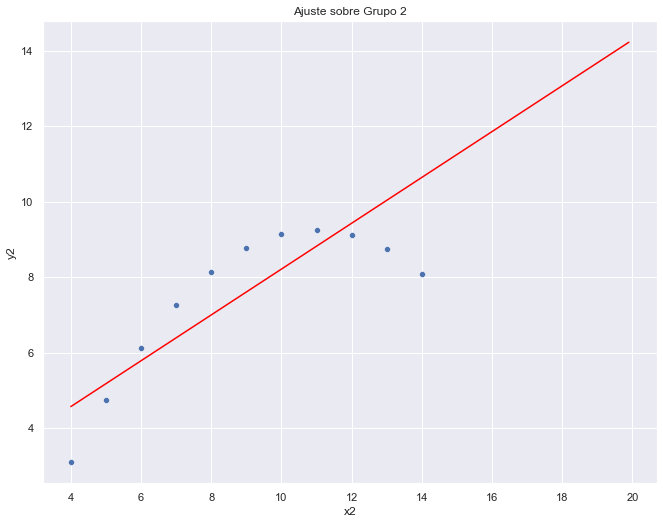

In [20]:
# graficos con seaborn
        
beta2_0 = model_rl2.intercept_
beta2_1 = model_rl2.coef_[0]
        
x2_range = np.arange(4,20,0.1)
        
df_plot2 = pd.DataFrame({'x':x2_range,
                        'y_true':[beta2_0 + beta2_1*n for n in x2_range]})
  
df2 = pd.DataFrame({'x':X2['x'],
                           'y_true':y2})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df2, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot2,ax=ax,color="red")

plt.xlabel('x2')
plt.ylabel('y2')
plt.title('Ajuste sobre Grupo 2')
plt.show()

Gráficamente nuestro modelo no se ajusta tan bien a los datos, pues la recta no toma ningún 1 dato. No obstante, los datos tienen una dispersión considerable, por lo que los puntos se encuentran cerca de la recta. Veamos las métricas:

In [21]:
from metrics_regression import *
from sklearn.metrics import r2_score
 
df_temp2 = pd.DataFrame(
    {
        'y':y2_test,
        'yhat': model_rl2.predict(X2_test)
        }
)

df_metrics2 = summary_metrics(df_temp2)
# calcular r2 y r2 ajustado

r2 = round(r2_score(y2_test, model_rl2.predict(X2_test)),4)

df_metrics2['r2'] =  r2

print('\nMetricas para el regresor x2:')
df_metrics2


Metricas para el regresor x2:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,1.1934,2.067,1.4377,0.1569,0.1541,0.1633,0.1381,0.1484,0.2186


Basado en los datos y las métricas, podemos decir que el modelo se aproxima a los datos, pero no lo suficiente.

In [22]:
# import some data to play with

X3 = df[df['grupo']=='Grupo_3'][['x']] # we only take the first two features.
y3 = df[df['grupo']=='Grupo_3']['y']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.35, random_state=42)

# print rows train and test sets
print('Separando informacion del Grupo 3:\n')
print('numero de filas data original : ',len(X3))
print('numero de filas train set     : ',len(X3_train))
print('numero de filas test set      : ',len(X3_test))

Separando informacion del Grupo 3:

numero de filas data original :  11
numero de filas train set     :  7
numero de filas test set      :  4


In [23]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl3 = LinearRegression() # Creando el modelo.

In [24]:
# ajustando el modelo
model_rl3.fit(X3_train, y3_train) 

LinearRegression()

In [25]:
# Lista de coeficientes B para cada X

beta3_0 = round(model_rl3.intercept_,2)
beta3_1 = round(model_rl3.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f_3(x) = {beta3_0} + {beta3_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f_3(x) = 2.23 + 0.61*x


In [26]:
# predicciones
Y3_predict = model_rl3.predict(X3_test)
Y3_predict

array([10.77377232,  8.33189732,  6.50049107,  5.27955357])

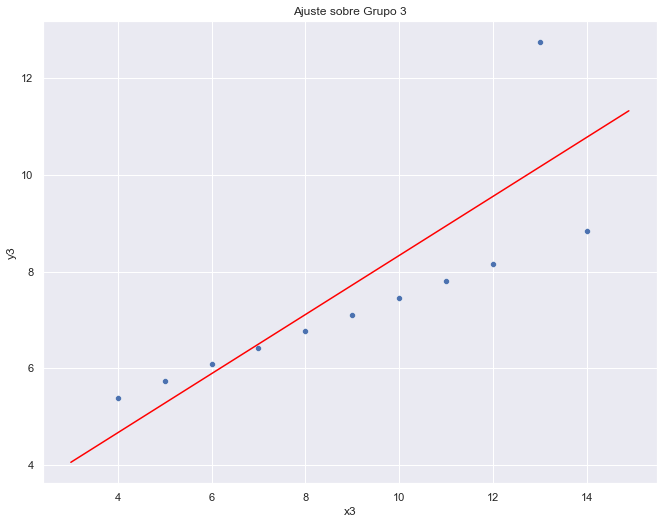

In [27]:
# graficos con seaborn
        
beta3_0 = model_rl3.intercept_
beta3_1 = model_rl3.coef_[0]
        
x3_range = np.arange(3,15,0.1)
        
df_plot3 = pd.DataFrame({'x':x3_range,
                        'y_true':[beta3_0 + beta3_1*n for n in x3_range]})
  
df3 = pd.DataFrame({'x':X3['x'],
                           'y_true':y3})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df3, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot3,ax=ax,color="red")

plt.xlabel('x3')
plt.ylabel('y3')
plt.title('Ajuste sobre Grupo 3')
plt.show()

Gráficamente nuestro modelo no se ajusta tan bien a los datos, pues la recta no toma ningún dato. No obstante, los datos tienen una dispersión considerable, por lo que los puntos se encuentran cerca de la recta. Veamos las métricas:

In [28]:
from metrics_regression import *
from sklearn.metrics import r2_score
 
df_temp3 = pd.DataFrame(
    {
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        }
)

df_metrics3 = summary_metrics(df_temp3)
# calcular r2 y r2 ajustado

r2 = round(r2_score(y3_test, model_rl3.predict(X3_test)),4)

df_metrics3['r2'] =  r2

print('\nMetricas para el regresor x3:')
df_metrics3


Metricas para el regresor x3:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.8342,1.1773,1.085,0.1067,0.1057,0.1173,0.0943,0.1005,0.1432


Basado en los datos y las métricas, podemos decir que el modelo se aproxima a los datos, pero no lo suficiente.

In [29]:
# import some data to play with

X4 = df[df['grupo']=='Grupo_4'][['x']] # we only take the first two features.
y4 = df[df['grupo']=='Grupo_4']['y']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.43, random_state=42)

# print rows train and test sets
print('Separando informacion del Grupo 4:\n')
print('numero de filas data original : ',len(X4))
print('numero de filas train set     : ',len(X4_train))
print('numero de filas test set      : ',len(X4_test))

Separando informacion del Grupo 4:

numero de filas data original :  11
numero de filas train set     :  6
numero de filas test set      :  5


In [30]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl4 = LinearRegression() # Creando el modelo.

In [31]:
# ajustando el modelo
model_rl4.fit(X4_train, y4_train) 

LinearRegression()

In [32]:
# Lista de coeficientes B para cada X

beta4_0 = round(model_rl4.intercept_,2)
beta4_1 = round(model_rl4.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f_4(x) = {beta4_0} + {beta4_1}*x")

El mejor ajuste lineal viene dado por la recta: 

     f_4(x) = 2.61 + 0.52*x


In [33]:
# predicciones
Y4_predict = model_rl4.predict(X4_test)
Y4_predict

array([6.776, 6.776, 6.776, 6.776, 6.776])

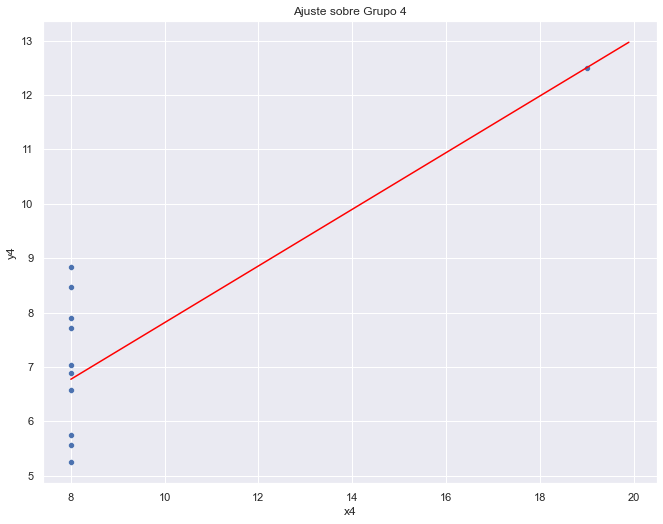

In [34]:
# graficos con seaborn
        
beta4_0 = model_rl4.intercept_
beta4_1 = model_rl4.coef_[0]
        
x4_range = np.arange(8,20,0.1)
        
df_plot4 = pd.DataFrame({'x':x4_range,
                        'y_true':[beta4_0 + beta4_1*n for n in x4_range]})
  
df4 = pd.DataFrame({'x':X4['x'],
                           'y_true':y4})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df4, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot4,ax=ax,color="red")

plt.xlabel('x4')
plt.ylabel('y4')
plt.title('Ajuste sobre Grupo 4')
plt.show()

Gráficamente nuestro modelo no se ajusta a los datos, y la recta solo toma 1 dato. Veamos las métricas:

In [35]:
from metrics_regression import *
from sklearn.metrics import r2_score
 
df_temp4 = pd.DataFrame(
    {
        'y':y4_test,
        'yhat': model_rl4.predict(X4_test)
        }
)

df_metrics4 = summary_metrics(df_temp4)
# calcular r2 y r2 ajustado

r2 = round(r2_score(y4_test, model_rl4.predict(X4_test)),4)

df_metrics4['r2'] =  r2

print('\nMetricas para el regresor x4:')
df_metrics4


Metricas para el regresor x4:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.5284,0.4559,0.6752,0.0697,0.0694,0.0731,0.0615,0.0735,-0.7992


Basado en los datos y las métricas, podemos decir que el modelo no se ajusta a los datos.